In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/scottcha/src/timeseriesAI')
from tsai.all import *
package_versions()
hardware_details()

tsai       : 0.1.0
fastai2    : 0.0.26
fastcore   : 0.1.30
torch      : 1.6.0
scipy      : 1.5.2
numpy      : 1.19.1
pandas     : 1.1.0
Total RAM  :  47.07 GB
Used RAM   :  21.87 GB
n_cpus     : 16
device     : cuda (GeForce GTX 1080 Ti)


In [3]:
import xarray as xr
from joblib import Parallel, delayed
import pickle

In [4]:
temp_path = '/media/scottcha/Data/Temp/'
final_path = '/media/scottcha/E1/Temp/'

In [25]:
i = 2
X_df = xr.open_zarr(temp_path + '/X_' + 'test' + '_' + str(i) + '.0.zarr/')
y_df = pd.read_parquet(temp_path + '/y_' + 'test' + '_' + str(i) + '.0.parquet')

In [26]:
y_df.iloc[1]

UnifiedRegion              Gunnison Zone
Unnamed: 0                           114
latitude                         38.7391
longitude                       -106.704
UnifiedRegionleft          Gunnison Zone
                            ...         
BottomLineSummary                no-data
Day1WarningText                  no-data
Day2WarningText                  no-data
parsed_date          2018-11-20 00:00:00
season                             18-19
Name: 1, Length: 301, dtype: object

In [39]:
list(X_df.variable.values).index('SNOD_surface_avg')

1032

In [27]:
#check data
X_df.vars.sel(variable='SNOD_surface_avg').isel(sample=1)

<xarray.DataArray 'vars' (time: 180)>
array([     nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan, 0.044298,
       0.034412, 0.047212, 0.050715, 0.087223, 0.075625, 0.061544, 0.052231,
       0.050212, 0.037768, 0.024764, 0.108682, 0.074953, 0.06105 , 0.046642,
       0.039942, 0.002136, 0.002187, 0.001866, 0.00126 ])
Coordinates:
    latitude   float64 ...
    longitude  float64 ...
    sample     <U34 '2018-11-20 00:00:00: Gunnison Zone'
    variable   <U52 'SNOD_surface_avg'
Dimensions without coordinates: time
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [12]:
#check data
X_df.vars.sel(sample='2017-12-24 00:00:00: North San Juan Mountains', variable='SNOD_surface_avg').isel(sample=0)

<xarray.DataArray 'vars' (time: 180)>
array([         nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan,
                nan, 1.199237e-02, 9.451265e-03, 9.601166e-03, 9.451265e-03,
       1.511635e-02,          nan, 2.977432e-02, 2.267761e-02, 1.050161e-02,
       1.000972e-02, 1.053340e-02, 9.391304e-03, 5.458343e-03, 2.098615e-04,
       2.098615e-04, 0.000000e+00, 6.961248e-02, 7.990667e-02, 5.599070e-02,
       3.736722e-02, 2.602470e-02, 1.748326e-02, 9.776328e-03, 5.696242e-04,
       4.796835e-04, 5.696242e-04, 4.197231e-04, 7.078455e-03, 2.195774e-04,
       2.070856e-04, 2.051424e-04, 2.526111e-05, 2.720427e-05, 2.765779e-02,
       2.623269e-04, 2.506680e-04, 2.642701e-04, 2.623269e-04, 2.098615e-04,
       1.798813e-04, 0.000000e+00, 0.000000e+00, 0.000000e+00, 9.771331e-05,
       0.000000e+00, 2.526111e-05, 2.526111e-05, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 3.400499e-02, 1.132937e-01, 9.020535e-02, 9.234393e-02])
Coordinates:
    latitude   float64 ...
    longitude  float64 ...
    sample     <U45 '2017-12-24 00:00:00: North San Juan Mountains'
    variable   <U52 'SNOD_surface_avg'
Dimensions without coordinates: time
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

In [29]:
y_df.iloc[1]['Day1DangerAboveTreeline']

'Low'

In [11]:
X_df.vars.values[:,:,:].shape

(52, 1131, 180)

In [20]:
pd.DataFrame(X_df.vars.values[2,:,:].T).tail()

,0,1,2,3,4,5,6,7,8,9,...,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130
175,0.000116,0.000134,0.000095,0.000130,0.000138,0.000126,0.000132,0.000135,0.000128,0.000131,...,NaN,0.000742,0.003919,-0.002226,100.836446,101.874384,100.504243,0.1196,0.1196,0.1196
176,0.000087,0.000102,0.000065,0.000126,0.000132,0.000120,0.000126,0.000130,0.000122,0.000121,...,NaN,-0.003939,0.005589,-0.011060,107.266048,107.786695,105.416553,0.1196,0.1196,0.1196
177,0.000102,0.000117,0.000081,0.000075,0.000110,0.000060,0.000116,0.000120,0.000111,0.000125,...,NaN,-0.005622,-0.001807,-0.008965,57.584285,64.979780,48.982085,0.1196,0.1196,0.1196
178,0.000093,0.000103,0.000079,0.000105,0.000125,0.000076,0.000119,0.000122,0.000116,0.000085,...,NaN,-0.007071,-0.003367,-0.011736,45.168136,46.215820,44.068727,0.1196,0.1196,0.1196
179,0.000112,0.000133,0.000090,0.000109,0.000119,0.000103,0.000122,0.000126,0.000119,0.000123,...,NaN,-0.007714,0.000876,-0.013577,61.332305,75.967627,48.485699,0.1196,0.1196,0.1196


In [5]:
def prepare_batch(X, y):#, offset=0, compute_tsfresh=False, known_relevant_features=None, n_jobs=14):
    #ensure, X and y indexes are aligned
    X = X.sortby(['sample', 'latitude', 'longitude'])
    #X = xr_batch.reset_index('sample', drop=True)
    sample = y.apply(lambda row: '{}: {}'.format(row['parsed_date'], row['UnifiedRegion']), axis=1)
    y['sample'] = sample
    y = y.set_index(['sample', 'latitude', 'longitude'])
    y.sort_index(inplace=True)    
    y.reset_index(drop=False, inplace=True)
    return X, y

In [6]:
X_train = None
y_train = None
X_test = None
y_test = None

In [7]:
def load_data(X, y, train_or_test='train', num_batches=200):
    for i in range(0,num_batches):
        print('On batch: ' + str(i))
        X_df = xr.open_zarr(temp_path + '/X_' + train_or_test + '_' + str(i) + '.0.zarr/')
        y_df = pd.read_parquet(temp_path + '/y_' + train_or_test + '_' + str(i) + '.0.parquet')
        X_df, y_df = prepare_batch(X_df, y_df)
        y_df['Day1AboveCat'] = y_df['Day1DangerAboveTreeline'].astype('category')
        if X is None:
            X = np.nan_to_num(X_df.vars.values)
        else:
            X = np.concatenate([X, X_df.vars.values], axis=0)
        y = pd.concat([y, y_df])
    return X, y

In [21]:
X_train, y_train = load_data(X_train, y_train)

On batch: 0
On batch: 1
On batch: 2
On batch: 3
On batch: 4
On batch: 5
On batch: 6
On batch: 7
On batch: 8
On batch: 9
On batch: 10
On batch: 11
On batch: 12
On batch: 13
On batch: 14
On batch: 15
On batch: 16
On batch: 17
On batch: 18
On batch: 19
On batch: 20
On batch: 21
On batch: 22
On batch: 23
On batch: 24
On batch: 25
On batch: 26
On batch: 27
On batch: 28
On batch: 29
On batch: 30
On batch: 31
On batch: 32
On batch: 33
On batch: 34
On batch: 35
On batch: 36
On batch: 37
On batch: 38
On batch: 39
On batch: 40
On batch: 41
On batch: 42
On batch: 43
On batch: 44
On batch: 45
On batch: 46
On batch: 47
On batch: 48
On batch: 49
On batch: 50
On batch: 51
On batch: 52
On batch: 53
On batch: 54
On batch: 55
On batch: 56
On batch: 57
On batch: 58
On batch: 59
On batch: 60
On batch: 61
On batch: 62
On batch: 63
On batch: 64
On batch: 65
On batch: 66
On batch: 67
On batch: 68
On batch: 69
On batch: 70
On batch: 71
On batch: 72
On batch: 73
On batch: 74
On batch: 75
On batch: 76
On batch:

In [16]:
X_df = xr.open_zarr(temp_path + '/X_' + 'train' + '_' + str(1) + '.0.zarr/')

In [17]:
X_df

<xarray.Dataset>
Dimensions:    (sample: 52, time: 180, variable: 1131)
Coordinates:
    latitude   (sample) float64 ...
    longitude  (sample) float64 ...
  * sample     (sample) object '2017-12-24 00:00:00: North San Juan Mountains...
  * variable   (variable) <U52 'ABSV_1000mb_avg' ... 'WILT_surface_min'
Dimensions without coordinates: time
Data variables:
    vars       (sample, variable, time) float64 ...

In [22]:
X_train.shape

(20800, 1131, 180)

In [24]:
y_train.shape

(20800, 303)

In [15]:
col_mean = np.nanmean(X_train, axis=(0,2))

In [16]:
col_mean.shape

(1131,)

In [123]:
inds = np.where(np.isnan(X_train))

In [124]:
X_train[inds] = np.take(col_mean, inds[1])

In [128]:
inds[1]

array([   0,    0,    0, ..., 1129, 1130, 1130])

In [9]:
#X_train

In [126]:
inds

(array([   52,    52,    52, ..., 10399, 10399, 10399]),
 array([   0,    0,    0, ..., 1129, 1130, 1130]),
 array([ 0,  1,  2, ..., 86,  0, 86]))

In [121]:
X_train.shape

(10400, 1131, 180)

In [12]:
X_train.shape

(10400, 1131, 180)

In [30]:
np.save(final_path + 'X_train.npy', X_train)

In [31]:
np.save(final_path + 'y_train.npy', y_train)

In [12]:
X_train = np.load(final_path + 'X_train.npy', mmap_mode='r')

In [13]:
y_train = np.load(final_path + 'y_train.npy', allow_pickle=True)

In [63]:
for i in range(0, 1131):
    print(str(X_train[0, i, -1]))

0.00024197505776722198
0.0003297558978948947
0.00017445591059696047
0.00012619694159484953
0.00013464863305139577
0.00011656813029228854
8.604752066968097e-05
8.98416393516317e-05
8.280342323717712e-05
0.0001562497824491148
0.00020069317474376758
0.00010157293986050053
0.00019566583854725063
0.00023425295777695907
0.0001386398349892919
9.510403753554398e-05
0.00010458117207841512
7.871666508402157e-05
0.00021204856468570109
0.0002643851536005001
0.00015840578105713273
0.00018031999861298648
0.00034315253247315557
6.46203569063529e-05
8.232388132081741e-05
8.621717312889889e-05
7.969166588432723e-05
0.00015422513826089364
0.0003105426167357015
3.3007044341041658e-06
0.0001589094781383438
0.0002925117727796514
1.0670391476060922e-06
0.0001745028572598651
0.0003288802636441984
4.3319650949384486e-05
0.0001485250620325252
0.0002772545560662588
7.723706418847754e-05
7.289331157236862e-05
7.681411552581237e-05
6.702854175475523e-05
0.00010482425599729735
0.00016108088075981965
6.072989985121

In [35]:
y_train[0]

array(['2015-11-17 00:00:00: South San Juan Mountains', 37.52173913043478,
       -107.99441340782123, 'South San Juan Mountains', 283,
       'South San Juan Mountains', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'High', 'Considerable', 'High', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 'no-data', 'no-data', 'no-data',
       'no-data', 'no-data', 'no-data', 20151117, 'no-data', 'none',
       '00010101 00:00', 'Considerable', 'Considerable', 'Considerable',
       'no-data', 'no-data', '00010101 00:00', 'no-data', 'no-data',
  

In [32]:
y_train.shape

(10400, 303)

In [130]:
del col_mean, inds
gc.collect()

879732

In [25]:
X_test = None
y_test = None

In [5]:
??combine_split_data

In [8]:
X_test, y_test = load_data(X_test, y_test, train_or_test='test', num_batches=40)

On batch: 0
On batch: 1
On batch: 2
On batch: 3
On batch: 4
On batch: 5
On batch: 6
On batch: 7
On batch: 8
On batch: 9
On batch: 10
On batch: 11
On batch: 12
On batch: 13
On batch: 14
On batch: 15
On batch: 16
On batch: 17
On batch: 18
On batch: 19
On batch: 20
On batch: 21
On batch: 22
On batch: 23
On batch: 24
On batch: 25
On batch: 26
On batch: 27
On batch: 28
On batch: 29
On batch: 30
On batch: 31
On batch: 32
On batch: 33
On batch: 34
On batch: 35
On batch: 36
On batch: 37
On batch: 38
On batch: 39


In [69]:
y_test.shape

(2080, 303)

In [70]:
X_test.shape

(2080, 1131, 180)

In [11]:
X[0,:,0]

memmap([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [ ]:
col_mean = np.nanmean(X, axis=(0,2))

In [71]:
inds = np.where(np.isnan(X_test))

In [72]:
X_test[inds] = np.take(col_mean, inds[1])

NameError: name 'col_mean' is not defined

In [32]:
y_train_df = pd.DataFrame(y_train, columns=y_test.columns)

In [33]:
y_train_df['Day1AboveCat'] = y_train_df['Day1AboveCat'].astype('category')

In [34]:
y_train = y_train_df

In [35]:
y_test_df = pd.DataFrame(y_test, columns=y_test.columns)
y_test_df['Day1AboveCat'] = y_test_df['Day1AboveCat'].astype('category')
y_test = y_test_df

In [36]:
X, y, splits = combine_split_data([X_train, X_test], [y_train['Day1AboveCat'].cat.codes.values,y_test['Day1AboveCat'].cat.codes.values])

In [24]:
X.shape

(120000, 1131, 180)

In [38]:
X_train.shape

(20800, 1131, 180)

In [18]:
final_path

'/media/scottcha/E1/Temp/'

In [39]:
np.save(final_path + 'X.npy', X)

In [40]:
np.save(final_path + 'y.npy', y)

In [11]:
from joblib import Parallel, delayed

In [12]:
np.nanmean(X[0:100000,0,:])

9.226132e-05

In [7]:
def calculate_feature_mean(feature):
    print('On feature: ' + str(feature))
    return np.nanmean(X[0:100000,feature,:])

In [69]:
def calculate_feature_std(feature):
    print('On feature: ' + str(feature))
    return np.nanstd(X[0:100000,feature,:])

In [8]:
feature_means = Parallel(n_jobs=4)(map(delayed(calculate_feature_mean), range(0,1131)))

In [70]:
feature_std = Parallel(n_jobs=4)(map(delayed(calculate_feature_std), range(0,1131)))

In [71]:
feature_std

[3.168977e-05,
 3.8151404e-05,
 3.9729734e-05,
 1.848747e-05,
 2.0589976e-05,
 2.0003798e-05,
 2.2254802e-05,
 2.2795373e-05,
 2.357784e-05,
 2.7462887e-05,
 2.9853307e-05,
 2.9238343e-05,
 4.10277e-05,
 4.520019e-05,
 4.424067e-05,
 1.590704e-05,
 1.6410742e-05,
 1.6527683e-05,
 5.223855e-05,
 6.7742454e-05,
 5.0993815e-05,
 5.648496e-05,
 8.832503e-05,
 4.923824e-05,
 1.2719349e-05,
 1.3444304e-05,
 1.2924686e-05,
 5.5692584e-05,
 9.9880286e-05,
 4.6275003e-05,
 5.1768722e-05,
 9.901346e-05,
 4.4477423e-05,
 4.6820827e-05,
 8.988064e-05,
 4.3657696e-05,
 4.265958e-05,
 8.0069825e-05,
 4.351397e-05,
 1.2364369e-05,
 1.3772883e-05,
 1.2931616e-05,
 4.0979805e-05,
 7.328978e-05,
 4.575591e-05,
 5.2339507e-05,
 7.645523e-05,
 6.156895e-05,
 7.6322474e-05,
 8.931511e-05,
 8.6183405e-05,
 8.0267004e-05,
 9.168609e-05,
 9.090032e-05,
 1.4859117e-05,
 1.756806e-05,
 1.5936188e-05,
 7.007868e-05,
 8.494127e-05,
 8.008125e-05,
 7.0626615e-05,
 8.28319e-05,
 8.473003e-05,
 7.02812e-05,
 7.75452

In [9]:
feature_means

[9.226132e-05,
 0.00012310808,
 6.2855324e-05,
 0.00010292571,
 0.00011669127,
 8.9409645e-05,
 9.978263e-05,
 0.00010817268,
 9.163938e-05,
 0.0001071972,
 0.00012906143,
 8.608308e-05,
 0.000107464475,
 0.00014390903,
 7.367478e-05,
 9.599921e-05,
 0.000102464204,
 8.9653535e-05,
 0.0001043552,
 0.00016358084,
 5.418455e-05,
 0.000102424856,
 0.00017798727,
 4.1907373e-05,
 9.481174e-05,
 0.000100515215,
 8.913979e-05,
 0.00010088152,
 0.00018340633,
 3.6303947e-05,
 9.9461686e-05,
 0.0001808979,
 3.513326e-05,
 9.7852084e-05,
 0.00017397462,
 3.5218953e-05,
 9.541624e-05,
 0.00016646128,
 3.4435066e-05,
 9.609249e-05,
 0.000103591236,
 8.870137e-05,
 9.230369e-05,
 0.00016092203,
 3.170257e-05,
 8.99292e-05,
 0.00016235496,
 2.3406006e-05,
 8.769859e-05,
 0.0001620547,
 1.8008956e-05,
 8.684541e-05,
 0.0001576474,
 2.010628e-05,
 9.890567e-05,
 0.000109847075,
 8.855883e-05,
 8.94892e-05,
 0.00015132829,
 3.0532592e-05,
 8.9249304e-05,
 0.00014406134,
 3.5726258e-05,
 8.67948e-05,
 

In [22]:
np.save(final_path + '/feature_means.npy', np.asarray(feature_means))

In [5]:
feature_means = np.load(final_path + '/feature_means.npy')

In [72]:
np.save(final_path + '/feature_std.npy', np.asarray(feature_std))

In [6]:
feature_means

array([9.2261318e-05, 1.2310808e-04, 6.2855324e-05, ..., 9.4567694e-02,
       9.4567694e-02, 9.4567694e-02], dtype=float32)

In [6]:
feature_std = np.load(final_path + '/feature_std.npy')

In [42]:
pickle.dump( splits, open( final_path + 'splits.p', 'wb' ) )

In [30]:
del X_test, X_train, y_test, y_train

In [31]:
del X, y, splits

In [7]:
X = np.load(temp_path + 'data/X_all2.npy', mmap_mode='r')

In [6]:
X = np.load(temp_path + 'data/X_small.npy', mmap_mode='r')

In [7]:
X = np.load(temp_path + 'data/Xtrain_batch_0_on_disk.npy', mmap_mode='r')

In [8]:
X.shape

(60000, 1131, 180)

In [9]:
X_size = 50000

In [10]:
indexes = [i for i in range(0,X.shape[0]) if i in range(0,X_size) or i in range(X_size,X.shape[0])]

In [9]:
X2 = X[indexes]

In [10]:
X2.shape

(30000, 1131, 180)

In [11]:
np.save(temp_path + 'data/X_small.npy', X2)

In [12]:
X = X2

In [13]:
#pd.DataFrame(X[:,0,:]).T.plot()

In [24]:
X_size

300000

In [25]:
num_y_train = 200
num_y_test = 100
y_df = None
for i in range(0, num_y_train):
    df = pd.read_parquet(temp_path + 'data/y_train_' + str(i) + '.0.parquet')  
    y_df = pd.concat([y_df, df])

y_df = y_df[:X_size]
for i in range(0, num_y_test):
    df = pd.read_parquet(temp_path + 'data/y_test_' + str(i) + '.0.parquet')  
    y_df = pd.concat([y_df, df])
    

FileNotFoundError: /media/scottcha/Data/Temp/data/y_test_40.0.parquet

In [10]:
num_y_train_per_batch = 100
num_y_batches = 1
num_y_test_batches = 1
y_df = None
for i in range(0, num_y_batches):
    for j in range(0, num_y_train_per_batch):
        df = pd.read_parquet(temp_path + 'data/y_train_batch_' + str(i) + '_' + str(j) + '.0.parquet')  
        y_df = pd.concat([y_df, df])

num_y_train_per_batch = 20 #100
for i in range(0, num_y_test_batches):
    for j in range(0, num_y_train_per_batch):
        df = pd.read_parquet(temp_path + 'data/y_test_batch_' + str(i) + '_' + str(j) + '.0.parquet')  
        y_df = pd.concat([y_df, df])

In [11]:
pickle.dump( y_df, open( final_path + 'y_df2.p', 'wb' ) )

In [12]:
 y_df = pickle.load( open(  final_path + 'y_df2.p', 'rb' ) )

In [63]:
#for testing
num_y_train_per_batch = 100
start_batch = 3
end_batch = 4

y_df = None
for i in range(start_batch, end_batch):
    for j in range(0, num_y_train_per_batch):
        df = pd.read_parquet(temp_path + 'data/y_train_batch_' + str(i) + '_' + str(j) + '.0.parquet')  
        y_df = pd.concat([y_df, df])



In [13]:
y_df.shape

(60000, 304)

In [14]:
X.shape

(60000, 1131, 180)

In [15]:
y_df[50000:]['Day1DangerAboveTreelineWithTrend'].value_counts()

Considerable_Falling    780
High_Rising             780
Low_Initial             780
Low_Flat                780
Moderate_Initial        780
Considerable_Initial    780
Moderate_Flat           780
Considerable_Flat       770
Moderate_Rising         760
Low_Falling             758
Moderate_Falling        757
High_Flat               750
Considerable_Rising     745
Name: Day1DangerAboveTreelineWithTrend, dtype: int64

In [16]:
y_df[:50000]['Day1DangerAboveTreelineWithTrend'].value_counts()

High_Flat               3900
Considerable_Falling    3900
Moderate_Initial        3900
Considerable_Initial    3900
High_Rising             3900
Low_Initial             3900
Considerable_Rising     3870
Considerable_Flat       3870
Moderate_Falling        3856
Moderate_Flat           3815
Low_Flat                3799
Low_Falling             3731
Moderate_Rising         3659
Name: Day1DangerAboveTreelineWithTrend, dtype: int64

In [30]:
y_df[:200000]['parsed_date'].value_counts().sort_index(ascending=False)

2018-04-29    100
2018-04-28    400
2018-04-27    159
2018-04-22     79
2018-04-21    177
             ... 
2015-11-15     99
2015-11-14     65
2015-11-13     90
2015-11-12      2
2015-11-11      9
Name: parsed_date, Length: 476, dtype: int64

In [31]:
y_df[200000:]['parsed_date'].value_counts().sort_index(ascending=False)

2019-04-14     112
2019-04-13     250
2019-04-12     172
2019-04-11      31
2019-04-08     257
              ... 
2018-11-19    1964
2018-11-18    1044
2018-11-17    1869
2018-11-16    1763
2018-11-15    1353
Name: parsed_date, Length: 137, dtype: int64

In [45]:
y_df.iloc[200001]

sample             2018-11-15 00:00:00: North San Juan Mountains
latitude                                                 38.1913
longitude                                               -107.073
UnifiedRegion                           North San Juan Mountains
Unnamed: 0                                                   410
                                       ...                      
Day1WarningText                                          no-data
Day2WarningText                                          no-data
parsed_date                                  2018-11-15 00:00:00
season                                                     18-19
Day1AboveCat                                                 Low
Name: 1, Length: 303, dtype: object

In [51]:
X[200001]

memmap([[          nan,           nan,           nan, ..., 9.4553019e-05,
         9.4748691e-05, 8.8077744e-05],
        [          nan,           nan,           nan, ..., 1.1374122e-04,
         1.1356277e-04, 1.0267049e-04],
        [          nan,           nan,           nan, ..., 6.8265130e-05,
         5.8885107e-05, 6.4224056e-05],
        ...,
        [          nan,           nan,           nan, ..., 6.2749743e-02,
         6.2749743e-02, 6.2749743e-02],
        [          nan,           nan,           nan, ..., 6.2749743e-02,
         6.2749743e-02, 6.2749743e-02],
        [          nan,           nan,           nan, ..., 6.2749743e-02,
         6.2749743e-02, 6.2749743e-02]], dtype=float32)

In [56]:
np.array_equal(X[200001], X[200002], equal_nan=True)

False

In [42]:
X[200001].shape

(1131, 180)

In [40]:
if X[200001] in X[0:200000,:,:]:
    print('found')
else:
    print('not found')

found


In [48]:
X[0:200000].shape

(200000, 1131, 180)

In [9]:
def compare_train_test(i):
    if i % 1000 == 0:
        print('On ' + str(i))
    if np.array_equal(X[200002], X[i], equal_nan=True):
        print('200002 is equal to ' + str(i))
        return i
    elif np.array_equal(X[200200], X[i], equal_nan=True):
        print('200200 is equal to ' + str(i))
        return i
    elif np.array_equal(X[200400], X[i], equal_nan=True):
        print('200400 is equal to ' + str(i))
        return i
    elif np.array_equal(X[201400], X[i], equal_nan=True):
        print('201400 is equal to ' + str(i))
        return i
    elif np.array_equal(X[211900], X[i], equal_nan=True):
        print('211900 is equal to ' + str(i))
        return i
    return None


In [10]:
equal_index = Parallel(n_jobs=12)(map(delayed(compare_train_test), range(0,200000)))

In [11]:
pd.Series(equal_index).value_counts()

Series([], dtype: int64)

In [ ]:
unique_vals = np.unique

In [47]:
 np.where(X[200001] == X[0:200000,:,:])

(array([     0,      0,      0, ..., 199999, 199999, 199999]),
 array([  81,   81,   81, ..., 1046, 1046, 1046]),
 array([165, 166, 171, ..., 172, 173, 177]))

In [31]:
y_df.shape

(220000, 303)

In [89]:
y_df.iloc[200000:200005]['Day1DangerAboveTreeline']

0         Low
1         Low
2    Moderate
3         Low
4         Low
Name: Day1DangerAboveTreeline, dtype: object

In [30]:
y_df['Day1AboveCat'] = y_df['Day1DangerAboveTreelineWithTrend'].astype('category')
y = y_df['Day1AboveCat'].cat.codes.values

In [31]:
y_df['Day1AboveCat']

0         Moderate_Initial
1         Moderate_Initial
2         Moderate_Initial
3         Moderate_Initial
4         Moderate_Initial
              ...         
495            Low_Falling
496    Considerable_Rising
497    Considerable_Rising
498    Considerable_Rising
499    Considerable_Rising
Name: Day1AboveCat, Length: 60000, dtype: category
Categories (13, object): ['Considerable_Falling', 'Considerable_Flat', 'Considerable_Initial', 'Considerable_Rising', ..., 'Moderate_Falling', 'Moderate_Flat', 'Moderate_Initial', 'Moderate_Rising']

In [32]:
y_df['Day1AboveCat'].cat.codes.head()

0    11
1    11
2    11
3    11
4    11
dtype: int8

In [18]:
y.shape

(300000,)

In [10]:
X_size=200000

In [45]:
splits_2 = (L([i for i in range(0,50000)]), L([i for i in range(50000,X.shape[0])]))

In [46]:
splits_2

((#50000) [0,1,2,3,4,5,6,7,8,9...],
 (#10000) [50000,50001,50002,50003,50004,50005,50006,50007,50008,50009...])

In [21]:
feature_means = (np.nan_to_num(feature_means))

In [22]:
np.isnan(feature_means).any()

False

In [23]:
feature_std = (np.nan_to_num(feature_std, nan=1.0))

In [24]:
np.isnan(feature_std).any()

False

In [25]:

class TSStandardizeNanMeanReplaceNan(Transform):
    "Standardize/destd batch of `NumpyTensor` or `TSTensor`"
    parameters, order = L('mean', 'std'), 99
    def __init__(self, mean=None, std=None, by_sample=False, by_var=False, verbose=False):
        self.mean = tensor(mean) if mean is not None else None
        self.std = tensor(std) if std is not None else None
        self.by_sample, self.by_var = by_sample, by_var
        if by_sample and by_var: self.axes = (2)
        elif by_sample: self.axes = (1, 2)
        elif by_var: self.axes = (0, 2)
        else: self.axes = ()
        self.verbose = verbose

    @classmethod
    def from_stats(cls, mean, std): return cls(mean, std)

    def setups(self, dl: DataLoader):
        if self.mean is None or self.std is None:
            pv(f'{self.__class__.__name__} setup mean={self.mean}, std={self.std}, by_sample={self.by_sample}, by_var={self.by_var}', self.verbose)
            x, *_ = dl.one_batch()
            x = torch.where(torch.isnan(x), torch.zeros_like(x), x)
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
            pv(f'mean: {self.mean}  std: {self.std}\n', self.verbose)

    def encodes(self, x:(NumpyTensor, TSTensor)):
        fill_values = torch.zeros_like(x)
        std_values = torch.zeros_like(x)
        #print('shape' + str(x.shape))
        for i in range(0,x.shape[1]):
            fill_values[:,i,:] = torch.full_like(x[:,i,:], feature_means[i])
            std_values[:,i,:] = torch.full_like(x[:,i,:], feature_std[i])
        
        #print('shape2' + str(fill_values.shape))
        #print(str(self.mean))
        x = torch.where(torch.isnan(x), fill_values, x)
        #print('here')
        #x[torch.isnan(x)] = 0
        if self.by_sample: 
            #print('here2')
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
        #return (x - self.mean) / self.std
        #return x
        t = (x - fill_values) / std_values
        del fill_values, std_values
        return torch.where(torch.isnan(t), torch.zeros_like(t), t)

In [27]:
class TSStandardizeNanMean(Transform):
    "Standardize/destd batch of `NumpyTensor` or `TSTensor`"
    parameters, order = L('mean', 'std'), 99
    def __init__(self, mean=None, std=None, by_sample=False, by_var=False, verbose=False):
        self.mean = tensor(mean) if mean is not None else None
        self.std = tensor(std) if std is not None else None
        self.by_sample, self.by_var = by_sample, by_var
        if by_sample and by_var: self.axes = (2)
        elif by_sample: self.axes = (1, 2)
        elif by_var: self.axes = (0, 2)
        else: self.axes = ()
        self.verbose = verbose

    @classmethod
    def from_stats(cls, mean, std): return cls(mean, std)

    def setups(self, dl: DataLoader):
        if self.mean is None or self.std is None:
            pv(f'{self.__class__.__name__} setup mean={self.mean}, std={self.std}, by_sample={self.by_sample}, by_var={self.by_var}', self.verbose)
            x, *_ = dl.one_batch()
            x = torch.where(torch.isnan(x), torch.zeros_like(x), x)
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
            pv(f'mean: {self.mean}  std: {self.std}\n', self.verbose)

    def encodes(self, x:(NumpyTensor, TSTensor)):
        
        x = torch.where(torch.isnan(x), torch.zeros_like(x), x)
        print('here')
        #x[torch.isnan(x)] = 0
        if self.by_sample: 
            print('here2')
            self.mean, self.std = x.mean(self.axes, keepdim=self.axes!=()), x.std(self.axes, keepdim=self.axes!=()) + 1e-7
        return (x - self.mean) / self.std

In [28]:
X.shape

(300000, 1131, 180)

In [47]:
tfms = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits_2, inplace=True)

<AxesSubplot:title={'center':'2'}>

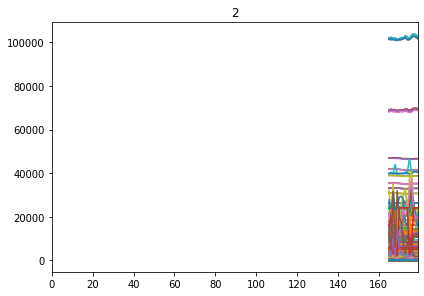

In [127]:
show_at(dsets.valid, 3)

In [48]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[128], batch_tfms=[TSStandardizeNanMeanReplaceNan()], num_workers=0)

In [190]:
b = dls.one_batch()

<AxesSubplot:>

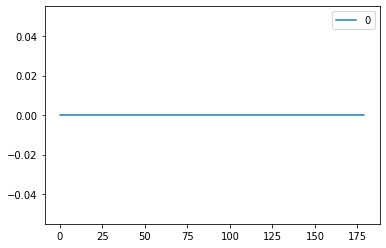

In [191]:
pd.DataFrame(np.array(b[0].cpu())[0,309]).plot()

In [192]:
feature_means[309]

0.0

In [193]:
feature_std[309]

1.0

In [27]:
np.argwhere(np.array(torch.isnan(b[0]).cpu()))

NameError: name 'b' is not defined

In [168]:
t = b[0][0]
torch.where(torch.isnan(t), torch.zeros_like(t), t)[309,0]

tensor(0., device='cuda:0')

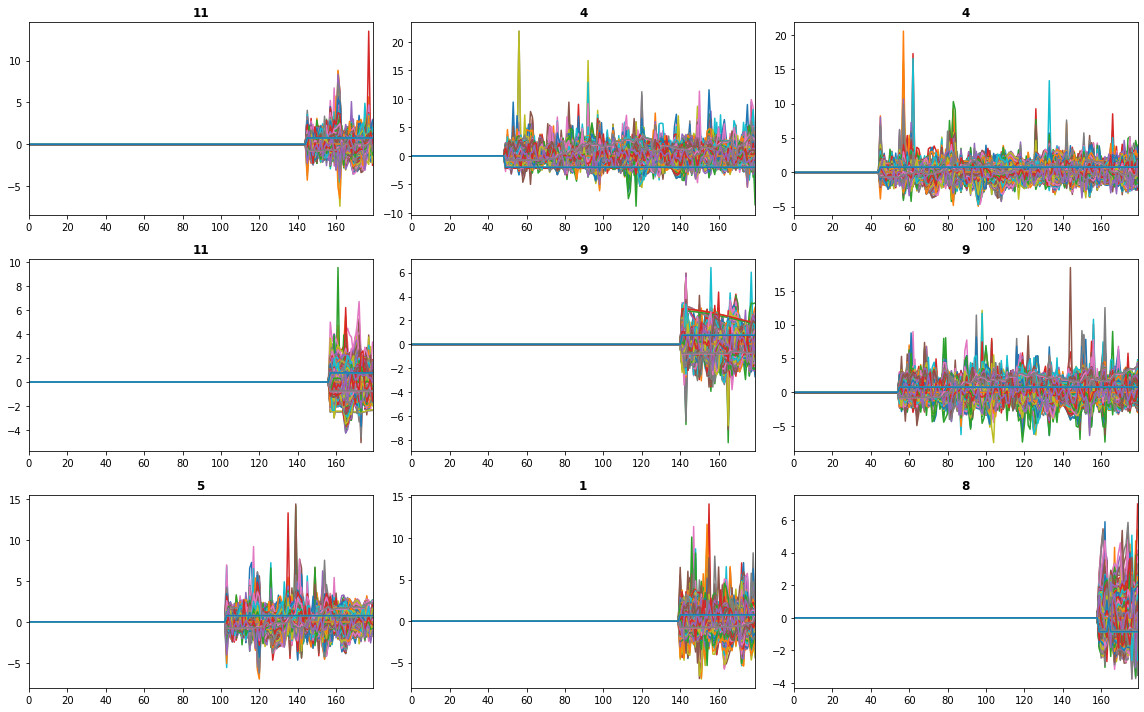

In [35]:
dls.show_batch()

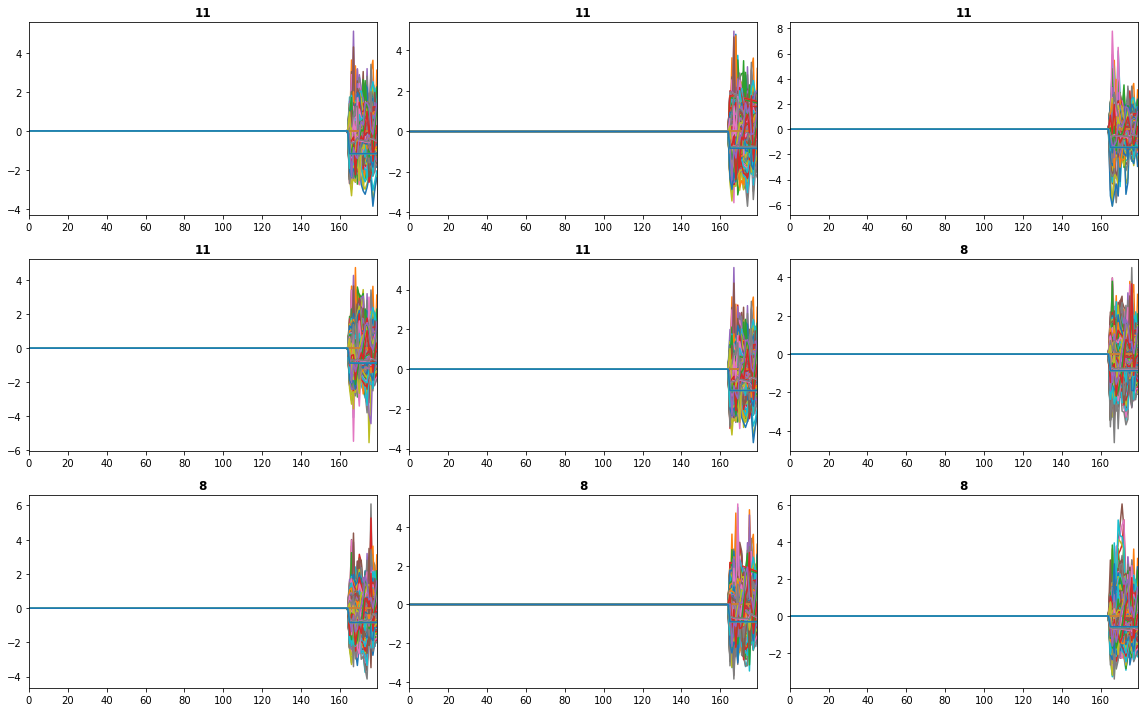

In [36]:
dls.valid.show_batch()

In [37]:
dls.c

13

In [38]:
dls.vars

/home/scottcha/src/fastai2/fastai2/torch_core.py:106: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(x)


1131

In [179]:
#todo; train on validation set to see if its valid
#parameter fit

In [51]:
??InceptionTime

On b:8 k:20 n:8 d:5


/home/scottcha/src/fastai2/fastai2/torch_core.py:106: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(x)


epoch,train_loss,valid_loss,accuracy,time
0,1.250411,1.342627,0.371650,00:25
1,1.154878,1.677450,0.283450,00:22
2,1.092806,1.726858,0.266250,00:22
3,0.967506,1.444092,0.370050,00:22
4,0.840881,1.099397,0.525000,00:22
5,0.745309,1.073860,0.574600,00:22


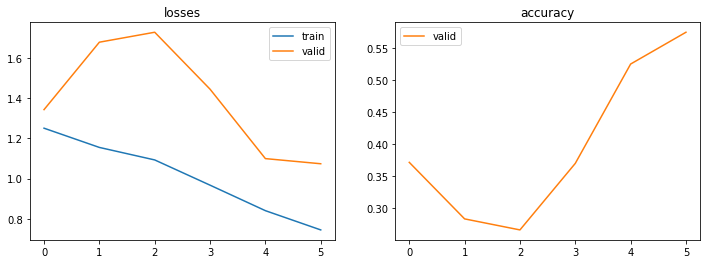

On b:8 k:20 n:8 d:6


epoch,train_loss,valid_loss,accuracy,time
0,1.196344,1.337869,0.351600,00:22
1,1.075936,1.158460,0.507450,00:22
2,0.894435,1.248963,0.475850,00:22
3,0.730328,1.172448,0.576400,00:22
4,0.601545,1.214130,0.555850,00:22
5,0.511468,1.248075,0.541350,00:22


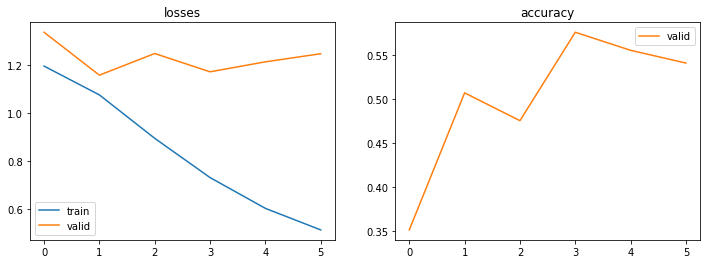

On b:8 k:20 n:8 d:7


epoch,train_loss,valid_loss,accuracy,time
0,1.242917,1.340017,0.374050,00:22
1,1.131393,1.704137,0.261700,00:23
2,0.949537,1.265880,0.417850,00:22
3,0.780254,0.831771,0.643400,00:22
4,0.647731,0.957916,0.582350,00:22
5,0.550887,1.014483,0.600900,00:22


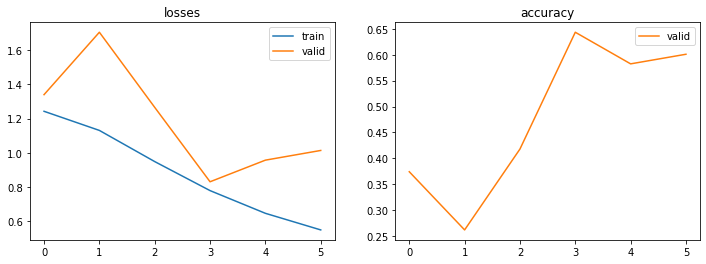

On b:8 k:20 n:32 d:5


epoch,train_loss,valid_loss,accuracy,time
0,1.196748,1.454278,0.298300,00:26
1,1.125703,1.355544,0.361200,00:24
2,0.963007,1.226938,0.587650,00:24
3,0.768476,1.211770,0.584450,00:24
4,0.618496,1.195748,0.605950,00:24
5,0.510206,1.233751,0.597100,00:24


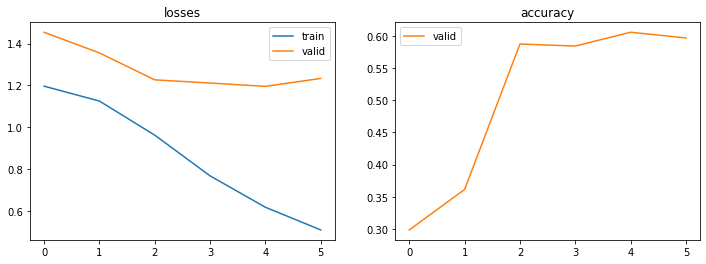

On b:8 k:20 n:32 d:6


epoch,train_loss,valid_loss,accuracy,time
0,1.166022,1.624686,0.281200,00:25
1,1.076134,1.537916,0.381950,00:25
2,0.975034,1.820139,0.407200,00:26
3,0.820620,1.160752,0.537800,00:26
4,0.692458,1.163646,0.573750,00:25
5,0.600687,1.215640,0.577400,00:25


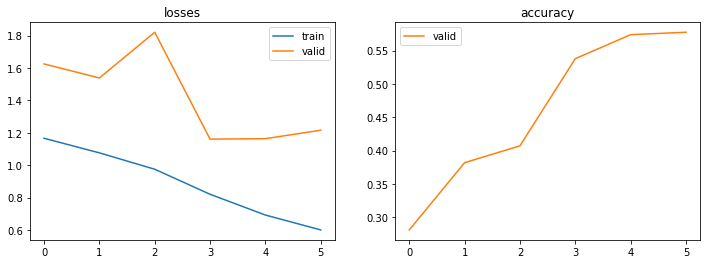

On b:8 k:20 n:32 d:7


epoch,train_loss,valid_loss,accuracy,time
0,1.188411,1.939001,0.318300,00:26
1,1.141575,1.687307,0.373750,00:26
2,1.064758,1.332250,0.349600,00:26
3,0.914751,1.028431,0.528400,00:26
4,0.756267,1.172108,0.568200,00:26
5,0.637692,1.151755,0.598500,00:26


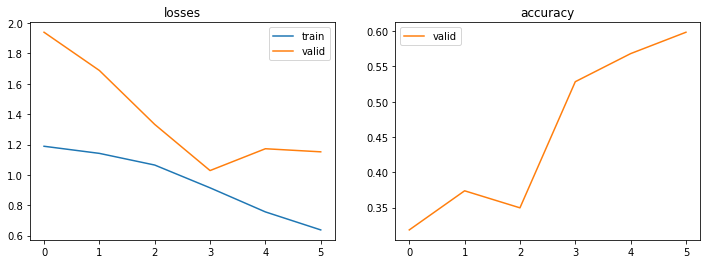

On b:8 k:20 n:64 d:5


epoch,train_loss,valid_loss,accuracy,time
0,1.194394,1.762453,0.284650,00:32
1,1.120371,1.533149,0.288800,00:29
2,1.113428,1.681546,0.342300,00:29
3,1.013316,1.143540,0.424400,00:29
4,0.882225,1.241055,0.513250,00:29
5,0.781370,1.265608,0.486950,00:29


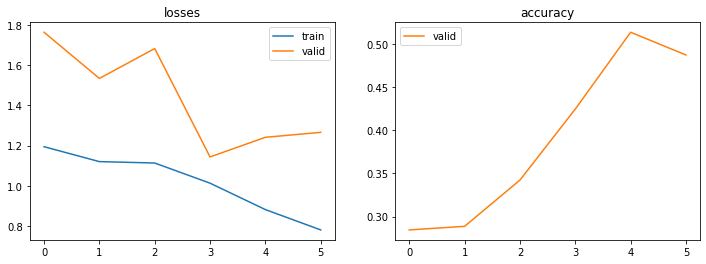

On b:8 k:20 n:64 d:6


RuntimeError: CUDA out of memory. Tried to allocate 180.00 MiB (GPU 0; 10.91 GiB total capacity; 8.87 GiB already allocated; 170.12 MiB free; 9.53 GiB reserved in total by PyTorch)
Exception raised from malloc at /pytorch/c10/cuda/CUDACachingAllocator.cpp:272 (most recent call first):
frame #0: c10::Error::Error(c10::SourceLocation, std::string) + 0x42 (0x7fd75a0ae1e2 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libc10.so)
frame #1: <unknown function> + 0x1e64b (0x7fd75a30464b in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libc10_cuda.so)
frame #2: <unknown function> + 0x1f464 (0x7fd75a305464 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libc10_cuda.so)
frame #3: <unknown function> + 0x1faa1 (0x7fd75a305aa1 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libc10_cuda.so)
frame #4: at::native::empty_cuda(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0x11e (0x7fd75d01090e in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #5: <unknown function> + 0xf33949 (0x7fd75b44a949 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #6: <unknown function> + 0xf4d777 (0x7fd75b464777 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #7: <unknown function> + 0x10e9c7d (0x7fd796200c7d in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #8: <unknown function> + 0x10e9f97 (0x7fd796200f97 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #9: at::empty(c10::ArrayRef<long>, c10::TensorOptions const&, c10::optional<c10::MemoryFormat>) + 0xfa (0x7fd79630ba1a in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #10: at::TensorIterator::fast_set_up(at::TensorIteratorConfig const&) + 0x56a (0x7fd795f98f8a in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #11: at::TensorIterator::build(at::TensorIteratorConfig&) + 0x76 (0x7fd795f9cff6 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #12: at::TensorIterator::TensorIterator(at::TensorIteratorConfig&) + 0xdd (0x7fd795f9d65d in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #13: at::TensorIterator::binary_op(at::Tensor&, at::Tensor const&, at::Tensor const&, bool) + 0x14a (0x7fd795f9d80a in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #14: <unknown function> + 0x17f5960 (0x7fd75bd0c960 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #15: at::native::threshold_backward_cuda(at::Tensor const&, at::Tensor const&, c10::Scalar) + 0x4f (0x7fd75bd0e3ef in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #16: <unknown function> + 0xf242c0 (0x7fd75b43b2c0 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cuda.so)
frame #17: <unknown function> + 0xa9b254 (0x7fd795bb2254 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #18: at::threshold_backward(at::Tensor const&, at::Tensor const&, c10::Scalar) + 0x183 (0x7fd7962e32a3 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #19: <unknown function> + 0x2f1492f (0x7fd79802b92f in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #20: <unknown function> + 0xa9b254 (0x7fd795bb2254 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #21: at::threshold_backward(at::Tensor const&, at::Tensor const&, c10::Scalar) + 0x183 (0x7fd7962e32a3 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #22: torch::autograd::generated::ReluBackward0::apply(std::vector<at::Tensor, std::allocator<at::Tensor> >&&) + 0x181 (0x7fd797e573a1 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #23: <unknown function> + 0x3375bb7 (0x7fd79848cbb7 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #24: torch::autograd::Engine::evaluate_function(std::shared_ptr<torch::autograd::GraphTask>&, torch::autograd::Node*, torch::autograd::InputBuffer&, std::shared_ptr<torch::autograd::ReadyQueue> const&) + 0x1400 (0x7fd798488400 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #25: torch::autograd::Engine::thread_main(std::shared_ptr<torch::autograd::GraphTask> const&) + 0x451 (0x7fd798488fa1 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #26: torch::autograd::Engine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x89 (0x7fd798481119 in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_cpu.so)
frame #27: torch::autograd::python::PythonEngine::thread_init(int, std::shared_ptr<torch::autograd::ReadyQueue> const&, bool) + 0x4a (0x7fd7a5c21dea in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/torch/lib/libtorch_python.so)
frame #28: <unknown function> + 0xc819d (0x7fd7d490a19d in /home/scottcha/anaconda3/envs/timeseriesai/lib/python3.7/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6)
frame #29: <unknown function> + 0x76db (0x7fd7d77526db in /lib/x86_64-linux-gnu/libpthread.so.0)
frame #30: clone + 0x3f (0x7fd7d747ba3f in /lib/x86_64-linux-gnu/libc.so.6)


In [21]:
bottleneck = [8, 32, 64]
ks = [20, 40, 60]
nb_filters = [8, 32, 64]
depth = [5,6,7]

for b in bottleneck:
    for k in ks:
        for n in nb_filters:
            for d in depth:
                dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[1024], batch_tfms=[TSStandardizeNanMeanReplaceNan()], num_workers=0)
                print('On b:' + str(b) + ' k:' + str(k) + ' n:' + str(n) + ' d:' + str(d))
                model = InceptionTime(dls.vars, dls.c, bottleneck=b, ks=k, nb_filters=n, depth=d)
                learn = Learner(dls, model, metrics=accuracy, callback_fns=[partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])
                learn.fit_one_cycle(6, lr_max=1e-2)
                learn.recorder.plot_metrics()
                del model, learn, dls
                torch.cuda.empty_cache()

In [ ]:
#TODO: remove the initial state values

In [104]:
?Learner

In [52]:
#model = InceptionTime(dls.vars, dls.c, bottleneck=8, ks=20, nb_filters=8, depth=5)
model = InceptionTime(dls.vars, dls.c, nb_filters=120)
matcor = MatthewsCorrCoef()

learn = Learner(dls, model, metrics=[matcor, accuracy], callback_fns=[partial(EarlyStoppingCallback, monitor='accuracy', min_delta=0.01, patience=5)])
learn.save('stage0')

In [40]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [92]:
learn.model

InceptionTime(
  (block): InceptionBlock(
    (inc_mods): ModuleList(
      (0): Inception(
        (conv_layers): ModuleList(
          (0): Conv1d(1131, 32, kernel_size=(39,), stride=(1,), padding=(19,))
          (1): Conv1d(1131, 32, kernel_size=(19,), stride=(1,), padding=(9,))
          (2): Conv1d(1131, 32, kernel_size=(9,), stride=(1,), padding=(4,))
        )
        (maxpool): MaxPool1d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
        (conv): Conv1d(1131, 32, kernel_size=(1,), stride=(1,))
        (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): ReLU()
      )
      (1): Inception(
        (bottleneck): Conv1d(128, 32, kernel_size=(1,), stride=(1,))
        (conv_layers): ModuleList(
          (0): Conv1d(32, 32, kernel_size=(39,), stride=(1,), padding=(19,))
          (1): Conv1d(32, 32, kernel_size=(19,), stride=(1,), padding=(9,))
          (2): Conv1d(32, 32, kernel_size=(9,), stride=(1,), paddin

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.005248074419796467)

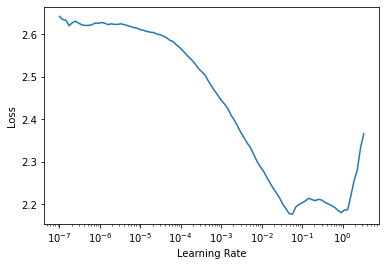

In [41]:
learn.load('stage0')
learn.lr_find()

In [56]:
#filters default (32, bs512)
learn.fit_one_cycle(3, lr_max=1e-2)
learn.save('stage1')

epoch,train_loss,valid_loss,matthews_corrcoef,accuracy,time
0,0.273977,5.023922,0.153151,0.206100,19:51
1,0.138040,5.734172,0.135382,0.191600,19:50
2,0.045219,7.629045,0.131123,0.185900,19:48


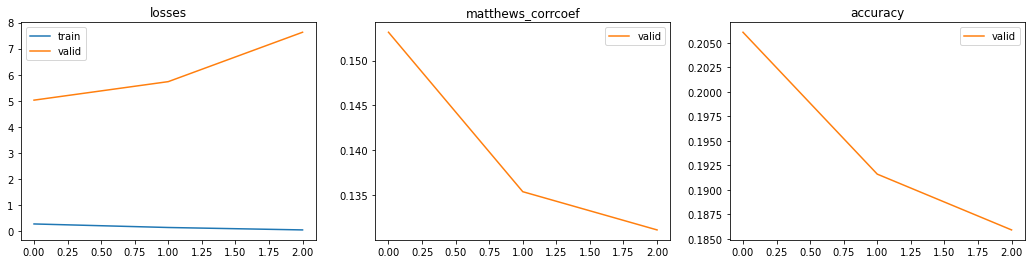

In [57]:
learn.recorder.plot_metrics()

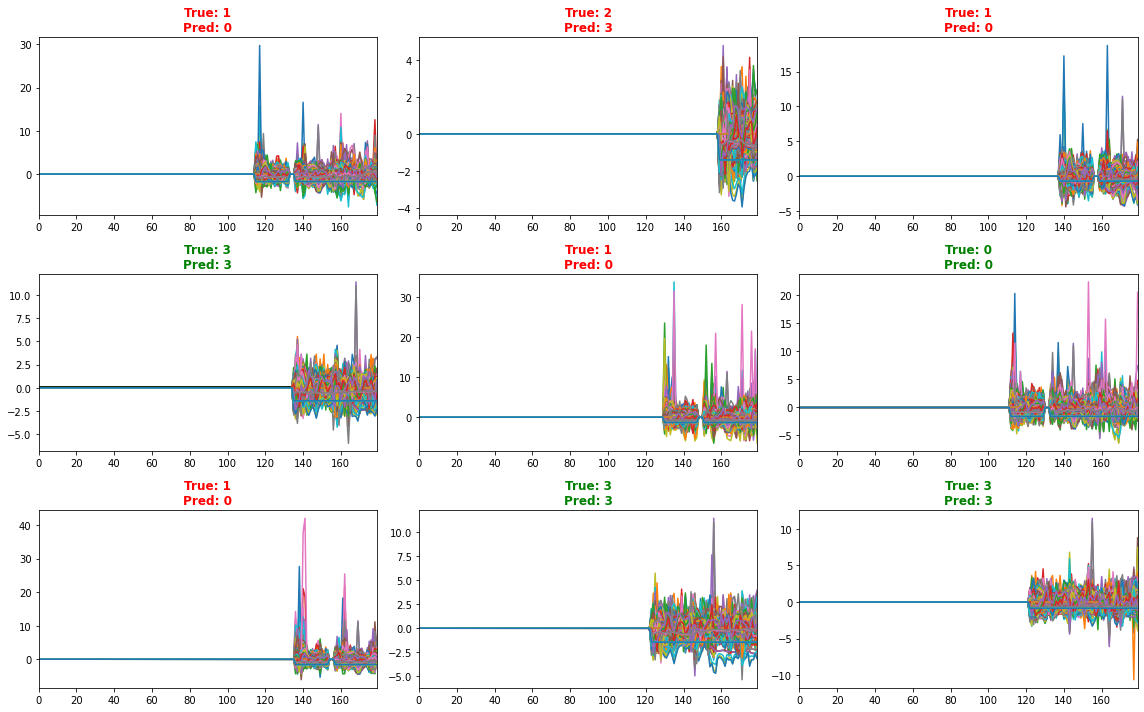

In [28]:
learn.show_results()

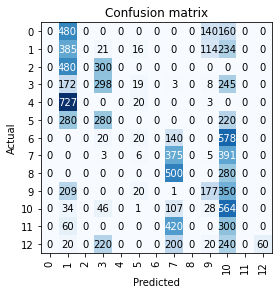

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
#no standarization
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [70]:
X_train_cutoff = 200000

In [79]:
??tsai.data.core.Datasets

In [24]:
tmp = dls.valid.one_batch()
ts_valid = tmp[0]
ts_valid.shape

torch.Size([1024, 1131, 180])

In [26]:
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [27]:
??ig.attribute

Object `ig.attribute` not found.


In [29]:
ig = IntegratedGradients(model.cuda())
#ig_nt = NoiseTunnel(ig)
#dl = DeepLift(model)
#gs = GradientShap(model)
#fa = FeatureAblation(model)

ig_attr_test = ig.attribute(inputs=ts_valid, n_steps=5)
#ig_nt_attr_test = ig_nt.attribute(X_test[X_train_cutoff:])
#dl_attr_test = dl.attribute(X_test[X_train_cutoff:])
#gs_attr_test = gs.attribute(X_test[X_train_cutoff:], X_train[0:X_train_cutoff])
#fa_attr_test = fa.attribute(X_test[X_train_cutoff:])

RuntimeError: CUDA out of memory. Tried to allocate 3.88 GiB (GPU 0; 10.91 GiB total capacity; 8.58 GiB already allocated; 1.02 GiB free; 8.60 GiB reserved in total by PyTorch)

In [86]:
test_ds = dls.valid.dataset.add_test(X, y)# In this case I'll use X and y, but this would be your test data
test_dl = dls.valid.new(test_ds)

In [87]:
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=test_dl, with_decoded=True)
valid_probas, valid_targets, valid_preds

(tensor([[0.0806, 0.6149, 0.0813, 0.2232],
         [0.0816, 0.6031, 0.0897, 0.2257],
         [0.0893, 0.5653, 0.1092, 0.2363],
         ...,
         [0.0106, 0.0061, 0.8819, 0.1013],
         [0.0152, 0.0100, 0.8461, 0.1286],
         [0.0399, 0.0329, 0.6829, 0.2444]]),
 tensor([1, 3, 0,  ..., 2, 2, 1]),
 tensor([1, 1, 1,  ..., 2, 2, 2]))

In [22]:
??tsai.data.core.TSDatasets

In [72]:
#rocket

In [21]:
type(dsets.train)

tsai.data.core.TSDatasets

In [ ]:
X_train = 

In [38]:
X_train = (X_train - np.nanmean(X_train,axis=(1, 2), keepdims=True)) / (
    np.nanstd(X_train, axis=(1, 2), keepdims=True) + 1e-8)
#X_valid = (X_valid - X_valid.mean(axis=(1, 2), keepdims=True)) / (
#    X_valid.std(axis=(1, 2), keepdims=True) + 1e-8)

In [41]:
X_test = (X_test - np.nanmean(X_test,axis=(1, 2), keepdims=True)) / (
    np.nanstd(X_test, axis=(1, 2), keepdims=True) + 1e-8)

In [40]:
np.save(final_path + 'X_train_norm.npy', X_train)

In [39]:
X_train.shape

(10400, 1131, 180)

In [46]:
X_train[:1000,:,:].shape

(1000, 1131, 180)

In [47]:
features

1131

In [48]:
seq_len

180

In [49]:
a = np.zeros(X_train[:1000,:,:].shape,dtype="float64") 

In [50]:
a = X_train[:1000,:,:]

In [53]:
a.dtype

dtype('float64')

In [58]:
_, features, seq_len = X_train.shape
model = ROCKET(features, seq_len, n_kernels=10000, kss=[7, 9, 11]).to(device)
X_train_tfm = model(torch.tensor(X_train[:5000,:,:], device=device, dtype=torch.float)).unsqueeze(1).cpu().numpy()
#X_valid_tfm = model(torch.tensor(X_valid, device=device)).unsqueeze(1).cpu().numpy()

In [60]:
X_test_tfm = model(torch.tensor(X_test, device=device, dtype=torch.float)).unsqueeze(1).cpu().numpy()

In [62]:
eps = 1e-6

In [63]:
# normalize 'per feature'
f_mean = X_train_tfm.mean(axis=0, keepdims=True)
f_std = X_test_tfm.std(axis=0, keepdims=True) + eps
X_train_tfm_norm = (X_train_tfm - f_mean) / f_std
X_test_tfm_norm = (X_test_tfm - f_mean) / f_std

In [83]:
X_test_tfm_norm.shape

(104, 1, 20000)

In [82]:
X_train_tfm_norm.shape

(5000, 1, 20000)

In [74]:
num_y_train = 10
y_df = None
for i in range(0, num_y_train):
    df = pd.read_parquet(temp_path + 'data/y_train_' + str(i) + '.0.parquet')  
    y_df = pd.concat([y_df, df])


In [75]:
y_df.shape

(5000, 302)

In [76]:
y_df['Day1AboveCat'] = y_df['Day1DangerAboveTreeline'].astype('category')
y_train = y_df['Day1AboveCat'].cat.codes.values

In [77]:
y_test['Day1AboveCat'] = y_test['Day1DangerAboveTreeline'].astype('category')
y_test2 = y_test['Day1AboveCat'].cat.codes.values

In [78]:
y_test2.shape

(104,)

In [84]:
X_test.shape

(104, 1131, 180)

In [85]:
X = np.concatenate((X_train_tfm_norm, X_test_tfm_norm))
y = np.concatenate((y_train, y_test2))
splits = (L(list(np.arange(len(X_train[:5000,:,:])))), L(list(np.arange(len(X_test), len(X)))))
print(X.shape, y.shape)

(5104, 1, 20000) (5104,)


In [86]:
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=30, num_workers=0)

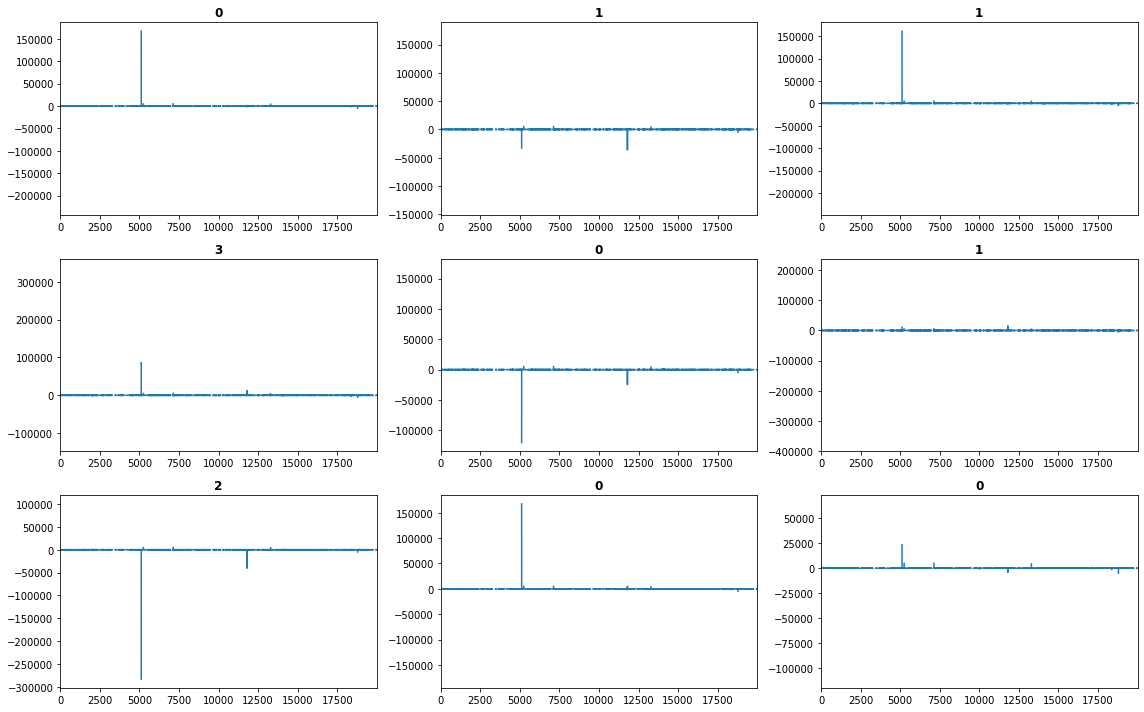

In [87]:
dls.show_batch()

In [88]:
def init(layer):
    if isinstance(layer, nn.Linear):
        nn.init.constant_(layer.weight.data, 0.)
        nn.init.constant_(layer.bias.data, 0.)

In [98]:

model = nn.Sequential(*[nn.Linear(20_000, dls.c), Squeeze(1)])
model.apply(init)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage-0')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.309573450380412e-07)

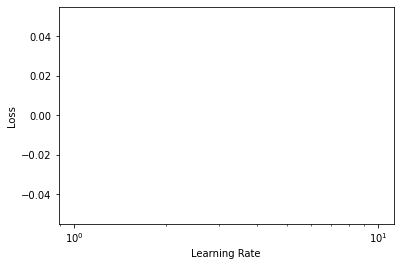

In [99]:
learn.lr_find()

In [93]:
X_train_tfm.shape

(5000, 1, 20000)

In [95]:
X_trian_final = np.nan_to_num(np.squeeze(X_train_tfm))

In [97]:
from sklearn.linear_model import RidgeClassifierCV
ridge = RidgeClassifierCV(alphas=np.logspace(-8, 8, 17), normalize=True)
ridge.fit(X_trian_final, y_train)
print('alpha: {:.2E}  train: {:.5f}  valid: {:.5f}'.format(ridge.alpha_, 
                                                           ridge.score(X_trian_final, y_train), 
                                                           ridge.score(np.nan_to_num(np.squeeze(X_test_tfm)), y_test2)))

alpha: 1.00E+03  train: 0.29140  valid: 0.25000
